In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

49.79097197800536 -164.2800780451023
15.2074528205993 98.84709066784899
-19.557215883365046 161.2185985651638
-82.56311736844978 23.341031679622233
43.46609472623072 -39.78241436453948
-33.3329313442727 -3.2771052956862263
49.375418461794084 -130.36898313288378
49.77972380205662 -46.772430752808646
34.60236971477248 -40.905092805553664
4.276480514335518 -18.596065405029663
61.99548758904194 -87.69357263875912
1.6721953488702752 -78.97302710113377
27.66593474203512 -153.59608977086316
-52.55524589869696 113.34266373238296
-52.65501868987104 -30.78720205484362
42.97924393594704 140.44594602509363
-62.22003747933452 127.55331188758004
7.156706285062057 -17.023385989627997
72.46652481409487 -169.42434594178536
54.04861135343285 57.6774481856946
7.2476138758011075 149.82444207061428
74.93455329188589 130.72484093281992
-72.17895156206433 -98.83614479282454
-61.467875070634 162.92362883547924
72.89389067893799 40.09137560277958
-47.63019714188017 138.44053643144372
11.45155801597835 -55.0326

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be351e166702a7d2fe5e74043eaa2fc0


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=be351e166702a7d2fe5e74043eaa2fc0&q=Boston


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | bethel
Processing Record 2 of Set 12 | ye
City not found. Skipping...
Processing Record 3 of Set 12 | poum
Processing Record 4 of Set 12 | bredasdorp
Processing Record 5 of Set 12 | ribeira grande
Processing Record 6 of Set 12 | jamestown
Processing Record 7 of Set 12 | port hardy
Processing Record 8 of Set 12 | torbay
Processing Record 9 of Set 12 | goderich
Processing Record 10 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 12 | tumaco
Processing Record 12 of Set 12 | kahului
Processing Record 13 of Set 12 | albany
Processing Record 14 of Set 12 | chuy
Processing Record 15 of Set 12 | iwanai
Processing Record 16 of Set 12 | new norfolk
Processing Record 17 of Set 12 | lavrentiya
Processing Record 18 of Set 12 | inzer
Processing Record 19 of Set 12 | lorengau
Processing Record 20 of Set 12 | tiksi
Processing Record 21 of Set 12 | punta arenas
Processing Record 

Processing Record 31 of Set 15 | miraflores
Processing Record 32 of Set 15 | cockburn town
Processing Record 33 of Set 15 | mar del plata
Processing Record 34 of Set 15 | qaanaaq
Processing Record 35 of Set 15 | asfi
Processing Record 36 of Set 15 | klaksvik
Processing Record 37 of Set 15 | plettenberg bay
Processing Record 38 of Set 15 | asyut
Processing Record 39 of Set 15 | stornoway
Processing Record 40 of Set 15 | tubruq
City not found. Skipping...
Processing Record 41 of Set 15 | hami
Processing Record 42 of Set 15 | umba
Processing Record 43 of Set 15 | kidal
Processing Record 44 of Set 15 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 15 | taoudenni
Processing Record 46 of Set 15 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 15 | butembo
Processing Record 48 of Set 15 | pevek
Processing Record 49 of Set 15 | planaltina
Processing Record 50 of Set 15 | salalah
Processing Record 1 of Set 16 | jalu
Processing Record 2 of Set 16 | niko

Processing Record 15 of Set 19 | todos santos
Processing Record 16 of Set 19 | songea
Processing Record 17 of Set 19 | danielskuil
Processing Record 18 of Set 19 | vardo
Processing Record 19 of Set 19 | hokitika
Processing Record 20 of Set 19 | raduzhnyy
Processing Record 21 of Set 19 | haines junction
Processing Record 22 of Set 19 | pandan
Processing Record 23 of Set 19 | sorvag
City not found. Skipping...
Processing Record 24 of Set 19 | margate
Processing Record 25 of Set 19 | pantao
Processing Record 26 of Set 19 | aklavik
Processing Record 27 of Set 19 | shitanjing
Processing Record 28 of Set 19 | matay
Processing Record 29 of Set 19 | atbasar
Processing Record 30 of Set 19 | diu
Processing Record 31 of Set 19 | nantai
Processing Record 32 of Set 19 | karlshamn
Processing Record 33 of Set 19 | san ignacio
Processing Record 34 of Set 19 | port moresby
Processing Record 35 of Set 19 | bandarbeyla
Processing Record 36 of Set 19 | grindavik
Processing Record 37 of Set 19 | kaohsiung


Processing Record 50 of Set 22 | estelle
Processing Record 1 of Set 23 | itaituba
Processing Record 2 of Set 23 | kieta
Processing Record 3 of Set 23 | half moon bay
Processing Record 4 of Set 23 | karasjok
Processing Record 5 of Set 23 | harper
Processing Record 6 of Set 23 | puerto escondido
Processing Record 7 of Set 23 | port lincoln
Processing Record 8 of Set 23 | guerrero negro
Processing Record 9 of Set 23 | biltine
Processing Record 10 of Set 23 | yulara
Processing Record 11 of Set 23 | barabai
Processing Record 12 of Set 23 | la rioja
Processing Record 13 of Set 23 | kuytun
Processing Record 14 of Set 23 | sao joao da barra
Processing Record 15 of Set 23 | porto novo
Processing Record 16 of Set 23 | constitucion
Processing Record 17 of Set 23 | nguiu
City not found. Skipping...
Processing Record 18 of Set 23 | martapura
Processing Record 19 of Set 23 | tidore
City not found. Skipping...
Processing Record 20 of Set 23 | yataity
Processing Record 21 of Set 23 | bolungarvik
City 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,79.90,61,3,5.01,US,2022-09-21 19:02:42
1,Poum,-20.2333,164.0167,75.00,74,4,4.45,NC,2022-09-21 19:02:42
2,Bredasdorp,-34.5322,20.0403,52.79,87,0,0.63,ZA,2022-09-21 19:02:42
3,Ribeira Grande,38.5167,-28.7000,77.40,83,40,9.22,PT,2022-09-21 19:02:43
4,Jamestown,42.0970,-79.2353,73.04,78,100,8.05,US,2022-09-21 19:02:43
5,Port Hardy,50.6996,-127.4199,55.58,67,20,3.44,CA,2022-09-21 18:59:05
6,Torbay,47.6666,-52.7314,57.76,74,59,5.99,CA,2022-09-21 19:02:44
7,Goderich,43.7501,-81.7165,73.90,80,98,13.02,CA,2022-09-21 19:02:44
8,Tumaco,1.7986,-78.8156,79.52,75,51,8.46,CO,2022-09-21 19:02:44
9,Kahului,20.8947,-156.4700,82.85,80,13,10.00,US,2022-09-21 19:02:45


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [14]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-09-21 19:02:42,41.3712,-73.4140,79.90,61,3,5.01
1,Poum,NC,2022-09-21 19:02:42,-20.2333,164.0167,75.00,74,4,4.45
2,Bredasdorp,ZA,2022-09-21 19:02:42,-34.5322,20.0403,52.79,87,0,0.63
3,Ribeira Grande,PT,2022-09-21 19:02:43,38.5167,-28.7000,77.40,83,40,9.22
4,Jamestown,US,2022-09-21 19:02:43,42.0970,-79.2353,73.04,78,100,8.05
...,...,...,...,...,...,...,...,...,...
527,Zephyrhills,US,2022-09-21 19:13:35,28.2336,-82.1812,91.17,67,24,1.99
528,Japoata,BR,2022-09-21 19:16:45,-10.3467,-36.8011,78.82,69,18,12.06
529,Mount Gambier,AU,2022-09-21 19:16:46,-37.8333,140.7667,51.71,100,100,6.91
530,Vila Franca Do Campo,PT,2022-09-21 19:16:12,37.7167,-25.4333,75.61,81,64,2.73


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

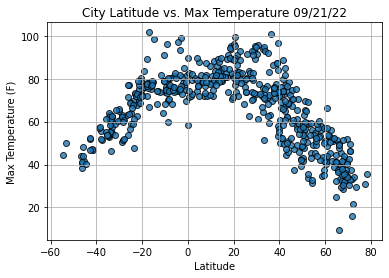

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

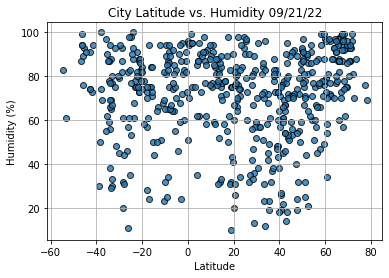

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

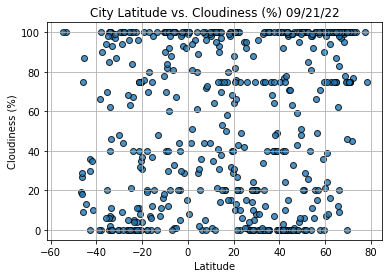

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

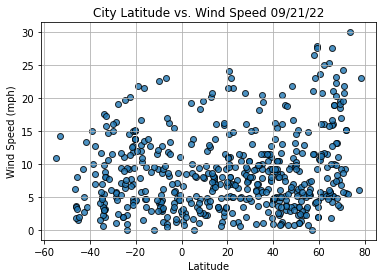

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [33]:
index13 = city_data_df.loc[13]
index13

City                  New Norfolk
Country                        AU
Date          2022-09-21 19:02:46
Lat                      -42.7826
Lng                      147.0587
Max Temp                    51.91
Humidity                       74
Cloudiness                     30
Wind Speed                   2.75
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4       True
       ...  
527     True
528    False
529    False
530     True
531     True
Name: Lat, Length: 532, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-09-21 19:02:42,41.3712,-73.4140,79.90,61,3,5.01
3,Ribeira Grande,PT,2022-09-21 19:02:43,38.5167,-28.7000,77.40,83,40,9.22
4,Jamestown,US,2022-09-21 19:02:43,42.0970,-79.2353,73.04,78,100,8.05
5,Port Hardy,CA,2022-09-21 18:59:05,50.6996,-127.4199,55.58,67,20,3.44
6,Torbay,CA,2022-09-21 19:02:44,47.6666,-52.7314,57.76,74,59,5.99
...,...,...,...,...,...,...,...,...,...
523,Kanniyakumari,IN,2022-09-21 19:16:44,8.0833,77.5667,78.60,85,0,18.32
526,Arona,ES,2022-09-21 19:16:45,28.0996,-16.6810,70.12,80,20,16.11
527,Zephyrhills,US,2022-09-21 19:13:35,28.2336,-82.1812,91.17,67,24,1.99
530,Vila Franca Do Campo,PT,2022-09-21 19:16:12,37.7167,-25.4333,75.61,81,64,2.73


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

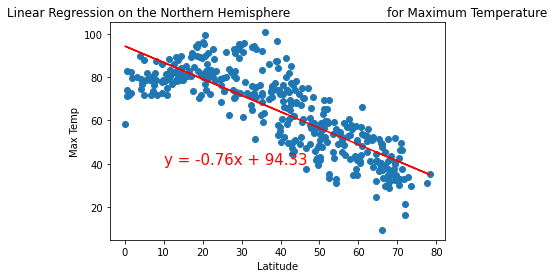

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

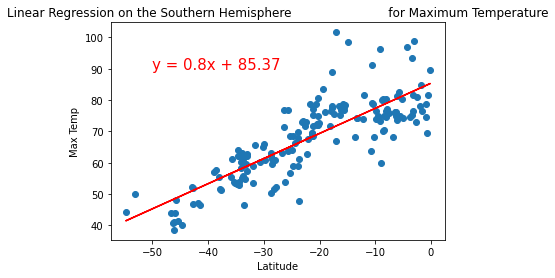

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

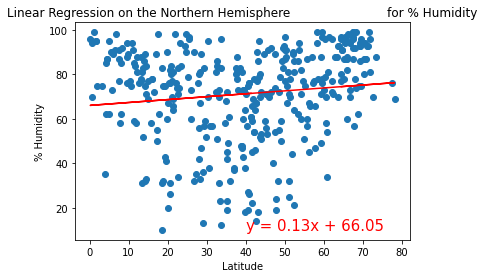

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

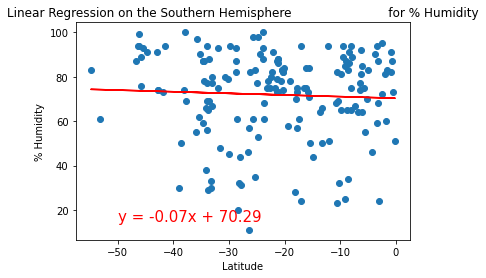

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

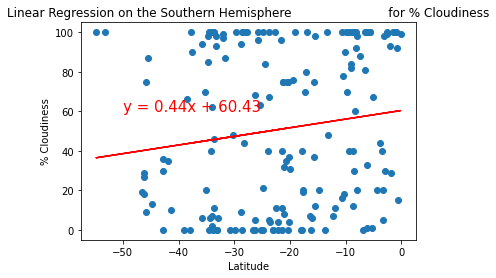

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

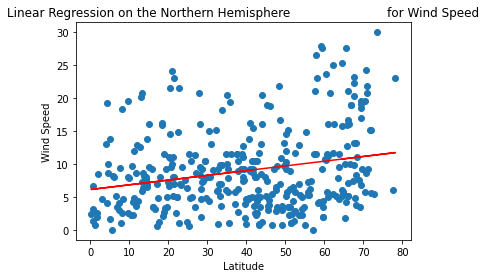

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

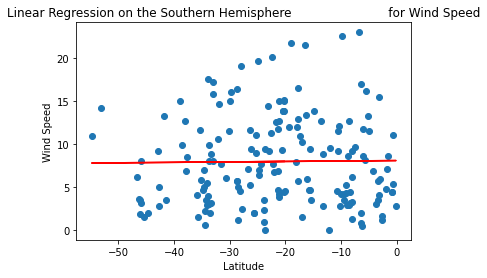

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))